In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
file = '../data/rankedrm.csv'
originalDF = pd.read_csv(file, encoding = "ISO-8859-1")

# 1. Descripción de los datos

In [4]:
#Columnas en el dataset
originalDF.columns

Index(['match_uuid', 'started', 'finished', 'map_type', 'steam_id.win',
       'name.win', 'country.win', 'rating.win', 'rating_change.win', 'civ.win',
       'color.win', 'steam_id.lose', 'name.lose', 'country.lose',
       'rating.lose', 'rating_change.lose', 'civ.lose', 'color.lose',
       'map_type.name', 'civ.lose.name', 'civ.win.name', 'matchup',
       'duration'],
      dtype='object')

In [5]:
#First 5 rows
originalDF.head(5)

,match_uuid,started,finished,map_type,steam_id.win,name.win,country.win,rating.win,rating_change.win,civ.win,...,country.lose,rating.lose,rating_change.lose,civ.lose,color.lose,map_type.name,civ.lose.name,civ.win.name,matchup,duration
0,004b580b-dd9f-2841-a771-3693b41d7361,2021-03-01 00:00:14,2021-03-01 00:28:25,9,7.656120e+16,Uwiza,GB,1101.0,16.0,11,...,NaN,1107.0,-16.0,12,3.0,Arabia,Goths,Franks,Franks-Goths,00:28:11
1,a20d7ab9-e240-6f45-9f8e-a2f5d7641558,2021-03-01 00:00:24,2021-03-01 00:27:01,19,7.656120e+16,[DaRs] Chirris_,MX,1671.0,NaN,27,...,GT,1680.0,NaN,28,1.0,Islands,Saracens,Portuguese,Portuguese-Saracens,00:26:37
2,c1407700-1238-3d47-b5d3-a40cbc9a9722,2021-03-01 00:00:30,2021-03-01 00:42:56,9,7.656120e+16,Frigma,CL,1254.0,16.0,19,...,GB,1268.0,-16.0,2,1.0,Arabia,Britons,Koreans,Britons-Koreans,00:42:26
3,1bdb9e60-81e6-514c-80fa-a2a56eed3e16,2021-03-01 00:00:26,2021-03-01 00:32:57,9,7.656120e+16,doctora Chinda Brandolino,AR,803.0,17.0,9,...,NaN,825.0,NaN,26,1.0,Arabia,Persians,Cumans,Cumans-Persians,00:32:31
4,12b09879-24b7-0049-a0b4-14dce9fe1950,2021-03-01 00:00:55,2021-03-01 00:44:07,16,NaN,PrecedentSolid4,NaN,661.0,33.0,11,...,CL,601.0,-22.0,16,1.0,Fortress,Italians,Franks,Franks-Italians,00:43:12


In [6]:
#Características de las columnas
originalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105624 entries, 0 to 105623
Data columns (total 23 columns):
match_uuid            105624 non-null object
started               105624 non-null object
finished              105624 non-null object
map_type              105624 non-null int64
steam_id.win          98864 non-null float64
name.win              105622 non-null object
country.win           98840 non-null object
rating.win            101329 non-null float64
rating_change.win     66682 non-null float64
civ.win               105624 non-null int64
color.win             105620 non-null float64
steam_id.lose         98440 non-null float64
name.lose             105623 non-null object
country.lose          98413 non-null object
rating.lose           97410 non-null float64
rating_change.lose    63380 non-null float64
civ.lose              105624 non-null int64
color.lose            105618 non-null float64
map_type.name         105624 non-null object
civ.lose.name         105624 non-nul

In [7]:
originalDF.describe()

,map_type,steam_id.win,rating.win,rating_change.win,civ.win,color.win,steam_id.lose,rating.lose,rating_change.lose,civ.lose,color.lose
count,105624.000000,9.886400e+04,101329.00000,66682.000000,105624.000000,105620.000000,9.844000e+04,97410.000000,63380.000000,105624.000000,105618.000000
mean,30.121241,7.656120e+16,1117.15423,15.643952,16.671277,2.110623,7.656120e+16,1115.251884,-15.781603,16.803037,2.106090
std,40.213780,4.291046e+08,303.27383,2.527700,10.217915,1.557288,4.268795e+08,301.353376,2.838264,10.320004,1.528983
min,9.000000,7.656120e+16,0.00000,-23.000000,0.000000,0.000000,7.656120e+16,16.000000,-57.000000,0.000000,0.000000
25%,9.000000,7.656120e+16,912.00000,15.000000,10.000000,1.000000,7.656120e+16,913.000000,-16.000000,9.000000,1.000000
50%,9.000000,7.656120e+16,1069.00000,15.000000,16.000000,2.000000,7.656120e+16,1070.000000,-15.000000,16.000000,2.000000
75%,29.000000,7.656120e+16,1276.00000,16.000000,25.000000,2.000000,7.656120e+16,1275.000000,-15.000000,25.000000,2.000000
max,150.000000,7.656120e+16,2609.00000,40.000000,36.000000,8.000000,7.656120e+16,2508.000000,0.000000,36.000000,8.000000


In [8]:
#Valores únicos
originalDF.nunique()

match_uuid            104722
started                93747
finished               98214
map_type                  12
steam_id.win           25158
name.win               26585
country.win              122
rating.win              2160
rating_change.win         43
civ.win                   37
color.win                  9
steam_id.lose          26950
name.lose              28613
country.lose             121
rating.lose             2193
rating_change.lose        48
civ.lose                  37
color.lose                 9
map_type.name             12
civ.lose.name             37
civ.win.name              37
matchup                  703
duration                4278
dtype: int64

In [9]:
#Tipos de datos en las columnas
originalDF.dtypes

match_uuid             object
started                object
finished               object
map_type                int64
steam_id.win          float64
name.win               object
country.win            object
rating.win            float64
rating_change.win     float64
civ.win                 int64
color.win             float64
steam_id.lose         float64
name.lose              object
country.lose           object
rating.lose           float64
rating_change.lose    float64
civ.lose                int64
color.lose            float64
map_type.name          object
civ.lose.name          object
civ.win.name           object
matchup                object
duration               object
dtype: object

In [10]:
originalDF.iloc[0]

match_uuid            004b580b-dd9f-2841-a771-3693b41d7361
started                                2021-03-01 00:00:14
finished                               2021-03-01 00:28:25
map_type                                                 9
steam_id.win                                   7.65612e+16
name.win                                             Uwiza
country.win                                             GB
rating.win                                            1101
rating_change.win                                       16
civ.win                                                 11
color.win                                                2
steam_id.lose                                          NaN
name.lose                                        DrGustach
country.lose                                           NaN
rating.lose                                           1107
rating_change.lose                                     -16
civ.lose                                                

## Explicación de cada columna

<b>match_uuid:</b> Identificador de la partida <br>
<b>started:</b> Fecha en la que inicio la partida, ejem.  <i>2021-03-01 00:00:14</i><br>
<b>finished:</b> Fecha en la que finalizó la partida, ejem. <i>2021-03-01 00:28:25</i><br>
<b>map_type:</b> Id del mapa, ejem. <i>9</i><br>
<b>steam_id.win:</b> Id en steam del ganador, ejem. 7.65612e+16</i><br>
<b>name.win:</b> Nombre de usuario del ganador, ejem.  Uwiza</i><br>
<b>country.win:</b> País del ganador, ejem.  GB</i><br>
<b>rating.win:</b> ELO del ganador (antes de la partida), ejem, 1101</i><br>
<b>rating_change.win:</b> Puntos de ELO que ganó por la partida, ejem. <i> 16</i><br>
<b>civ.win:</b> Id de la civilización ganadora, ejem. <i> 11</i><br>
<b>color.win:</b> Id del color del ganador, ejem. <i> 2</i><br>
<b>steam_id.lose:</b> Id en steam del perdedor, ejem. <i> NaN</i><br>
<b>name.lose:</b> Nombre del usuario del perdedor, ejem.  <i> DrGustach</i><br>
<b>country.lose:</b> País del perdedor, ejem. <i> NaN</i><br>
<b>rating.lose:</b> ELO del perdedor (antes de la partida), ejem. <i> 1107</i><br>
<b>rating_change.lose:</b> Puntos de ELO descontados al pardedor, ejem. <i> -16</i><br>
<b>civ.lose:</b> Id de la civilización perdedora, ejem. <i> 12</i><br>
<b>color.lose:</b> Id del color del perdedor, ejem. <i> 3</i><br>
<b>map_type.name:</b> Nombre del tipo del mapa, ejem. <i> Arabia</i><br>
<b>civ.lose.name:</b> Nombre de la civilización perdedora, ejem. <i> Goths</i><br>
<b>civ.win.name:</b> Nombre de la civilización ganadora, ejem. <i> Franks</i><br>
<b>matchup:</b> Matchup, ejemp. <i>Franks-Goths</i><br>
<b>duration:</b> Duración de la partida, ejem. <i> 00:28:11</i><br>


# 2. Missing Values

In [42]:
originalDF.isnull().sum()

match_uuid                0
started                   0
finished                  0
map_type                  0
steam_id.win           6760
name.win                  2
country.win            6784
rating.win             4295
rating_change.win     38942
civ.win                   0
color.win                 4
steam_id.lose          7184
name.lose                 1
country.lose           7211
rating.lose            8214
rating_change.lose    42244
civ.lose                  0
color.lose                6
map_type.name             0
civ.lose.name             0
civ.win.name              0
matchup                   0
duration                  0
dtype: int64

Dentro de los datos faltantes, podemos ver que los que presentan mayor cantidad de nulos son "rating_change.lose" y "rating_change.win" , que son los puntos restados por perder la partida y los puntos ganados, respectivamente.

También podemos apreciar nulos en ids de los jugadores, países y colores usados por los jugadores.

In [46]:
#


# Data Cleaning

In [48]:
countriesRes = originalDF.dropna(subset=['country.win','country.lose'])

In [55]:
print(pd.isnull(countriesRes['country.win'] ))

1         False
2         False
5         False
7         False
10        False
          ...  
105619    False
105620    False
105621    False
105622    False
105623    False
Name: country.win, Length: 92304, dtype: bool


# Data Visualization

### Most Played Map 

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
colors = sns.color_palette('pastel')[0:20]


<Figure size 432x288 with 0 Axes>

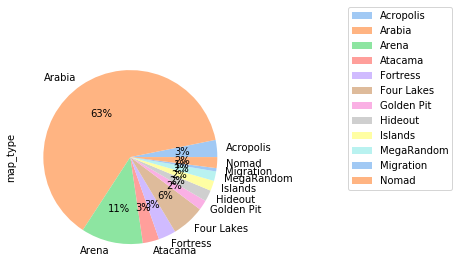

In [299]:
originalDF.groupby(['map_type.name']).count().plot(kind='pie',y ='map_type', autopct='%1.0f%%', colors = colors)
plt.legend(loc=(1.5,.35)) 

<h3 align="center">Arabia</h3> 

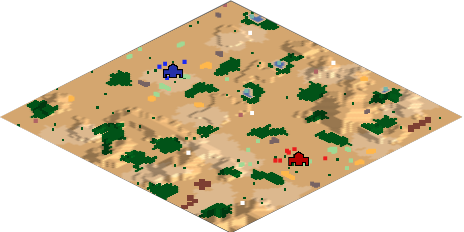

### Win Rate By Civilization

In [300]:
civwin =originalDF.groupby(['civ.win.name'])['civ.win.name'].count()


In [301]:

civlose =originalDF.groupby(['civ.lose.name'])['civ.lose.name'].count()



In [302]:
totalGamesByCiv = civwin.add(civlose)
civsWinningRatio = civwin/totalGamesByCiv

In [303]:
civsWinningRatioSorted = civsWinningRatio.sort_values(ascending = False)

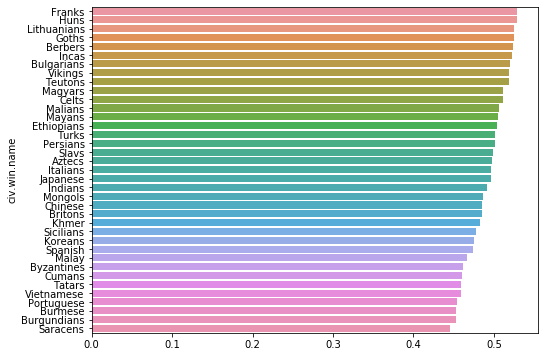

In [304]:
plt.figure(figsize=(8,6))
ax = sns.barplot(civsWinningRatioSorted.values, civsWinningRatioSorted.index,  orient = 'h')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<h3 align="center"> Los Francos con el mejor procentaje de victoria </h3>

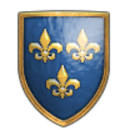

In [305]:
###Civ más usadas

In [306]:
totalGamesByCiv.sort_values(ascending = False)[0:5]

civ.win.name
Franks        20106
Britons       10937
Mayans        10424
Magyars        9996
Ethiopians     9969
dtype: int64


  
<h3>Las 5 civilizaciones más usadas:</h3>
<div>
    <ol>
        <li>Francos</li>
        <li>Britones</li>
        <li>Mayas</li>
        <li>Magiares</li>
        <li>Etiopes</li>
    </ol>
</div>

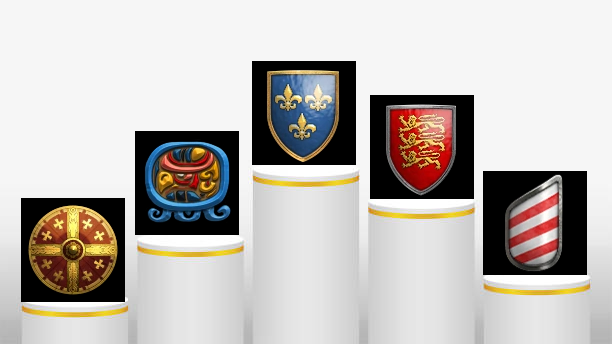

In [285]:
10626

0.528498955535661

In [187]:
plt.barplot(x=ratio, y=civ)

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

In [180]:
print(civ)

['Franks' 'Portuguese' 'Koreans' 'Cumans' 'Aztecs' 'Celts' 'Vietnamese'
 'Japanese' 'Italians' 'Britons' 'Ethiopians' 'Bulgarians' 'Incas'
 'Mayans' 'Mongols' 'Tatars' 'Magyars' 'Goths' 'Persians' 'Indians'
 'Khmer' 'Vikings' 'Lithuanians' 'Malians' 'Turks' 'Spanish' 'Huns'
 'Saracens' 'Byzantines' 'Malay' 'Chinese' 'Slavs' 'Burmese' 'Teutons'
 'Sicilians' 'Burgundians' 'Berbers']


In [230]:
sortedCiv =sorted(civ)

In [192]:
civ

array(['Franks', 'Portuguese', 'Koreans', 'Cumans', 'Aztecs', 'Celts',
       'Vietnamese', 'Japanese', 'Italians', 'Britons', 'Ethiopians',
       'Bulgarians', 'Incas', 'Mayans', 'Mongols', 'Tatars', 'Magyars',
       'Goths', 'Persians', 'Indians', 'Khmer', 'Vikings', 'Lithuanians',
       'Malians', 'Turks', 'Spanish', 'Huns', 'Saracens', 'Byzantines',
       'Malay', 'Chinese', 'Slavs', 'Burmese', 'Teutons', 'Sicilians',
       'Burgundians', 'Berbers'], dtype=object)

In [194]:
civName = pd.Series(civ)

In [197]:
ratioSeries = pd.Series(ratio)

In [210]:
data = pd.Series( ratio, index=civ)

In [211]:
data

Franks        NaN
Portuguese    NaN
Koreans       NaN
Cumans        NaN
Aztecs        NaN
Celts         NaN
Vietnamese    NaN
Japanese      NaN
Italians      NaN
Britons       NaN
Ethiopians    NaN
Bulgarians    NaN
Incas         NaN
Mayans        NaN
Mongols       NaN
Tatars        NaN
Magyars       NaN
Goths         NaN
Persians      NaN
Indians       NaN
Khmer         NaN
Vikings       NaN
Lithuanians   NaN
Malians       NaN
Turks         NaN
Spanish       NaN
Huns          NaN
Saracens      NaN
Byzantines    NaN
Malay         NaN
Chinese       NaN
Slavs         NaN
Burmese       NaN
Teutons       NaN
Sicilians     NaN
Burgundians   NaN
Berbers       NaN
dtype: float64

In [212]:
type(ratio)

pandas.core.series.Series